# Face Recognition

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 195MB/s]
100%|██████████| 65/65 [01:23<00:00,  1.28s/it]


Epoch 1/20, Train Acc: 0.2567, Val Acc: 0.3333
✅ Model saved!


100%|██████████| 65/65 [01:17<00:00,  1.19s/it]


Epoch 2/20, Train Acc: 0.5569, Val Acc: 0.4990
✅ Model saved!


100%|██████████| 65/65 [01:12<00:00,  1.12s/it]


Epoch 3/20, Train Acc: 0.7340, Val Acc: 0.6101
✅ Model saved!


100%|██████████| 65/65 [01:17<00:00,  1.20s/it]


Epoch 4/20, Train Acc: 0.8243, Val Acc: 0.6433
✅ Model saved!


100%|██████████| 65/65 [01:18<00:00,  1.20s/it]


Epoch 5/20, Train Acc: 0.8809, Val Acc: 0.6686
✅ Model saved!


100%|██████████| 65/65 [01:15<00:00,  1.17s/it]


Epoch 6/20, Train Acc: 0.9190, Val Acc: 0.7505
✅ Model saved!


100%|██████████| 65/65 [01:15<00:00,  1.16s/it]


Epoch 7/20, Train Acc: 0.9341, Val Acc: 0.7563
✅ Model saved!


100%|██████████| 65/65 [01:13<00:00,  1.14s/it]


Epoch 8/20, Train Acc: 0.9512, Val Acc: 0.7836
✅ Model saved!


100%|██████████| 65/65 [01:14<00:00,  1.15s/it]


Epoch 9/20, Train Acc: 0.9619, Val Acc: 0.7817


100%|██████████| 65/65 [01:13<00:00,  1.14s/it]


Epoch 10/20, Train Acc: 0.9732, Val Acc: 0.7661


100%|██████████| 65/65 [01:18<00:00,  1.21s/it]


Epoch 11/20, Train Acc: 0.9829, Val Acc: 0.7934
✅ Model saved!


100%|██████████| 65/65 [01:12<00:00,  1.12s/it]


Epoch 12/20, Train Acc: 0.9780, Val Acc: 0.7914


100%|██████████| 65/65 [01:15<00:00,  1.16s/it]


Epoch 13/20, Train Acc: 0.9888, Val Acc: 0.8031
✅ Model saved!


100%|██████████| 65/65 [01:16<00:00,  1.17s/it]


Epoch 14/20, Train Acc: 0.9902, Val Acc: 0.8109
✅ Model saved!


100%|██████████| 65/65 [01:15<00:00,  1.15s/it]


Epoch 15/20, Train Acc: 0.9917, Val Acc: 0.8051


100%|██████████| 65/65 [01:14<00:00,  1.15s/it]


Epoch 16/20, Train Acc: 0.9883, Val Acc: 0.8148
✅ Model saved!


100%|██████████| 65/65 [01:14<00:00,  1.15s/it]


Epoch 17/20, Train Acc: 0.9912, Val Acc: 0.8148


100%|██████████| 65/65 [01:17<00:00,  1.19s/it]


Epoch 18/20, Train Acc: 0.9951, Val Acc: 0.8129


100%|██████████| 65/65 [01:12<00:00,  1.11s/it]


Epoch 19/20, Train Acc: 0.9966, Val Acc: 0.8168
✅ Model saved!


100%|██████████| 65/65 [01:14<00:00,  1.15s/it]


Epoch 20/20, Train Acc: 0.9951, Val Acc: 0.7973


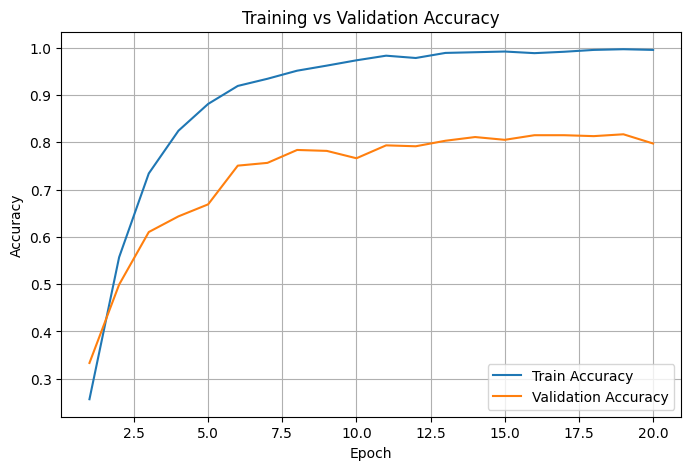

In [1]:
import os
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from tqdm import tqdm

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Paths
image_dir = '/kaggle/input/face-recognition-dataset/Original Images/Original Images/'

# Transforms
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Full dataset
full_dataset = datasets.ImageFolder(root=image_dir, transform=transform_train)
class_names = full_dataset.classes

# Stratified split
from sklearn.model_selection import train_test_split

targets = [sample[1] for sample in full_dataset.samples]
train_idx, val_idx = train_test_split(
    list(range(len(full_dataset))),
    test_size=0.2,
    stratify=targets,
    random_state=42
)

# Subset datasets
from torch.utils.data import Subset

train_dataset = Subset(full_dataset, train_idx)
val_dataset = Subset(datasets.ImageFolder(root=image_dir, transform=transform_val), val_idx)

# Class weights for imbalance
train_targets = [full_dataset.samples[i][1] for i in train_idx]
class_counts = np.bincount(train_targets)
class_weights = 1. / class_counts
sample_weights = [class_weights[label] for label in train_targets]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model
model = models.resnet18(pretrained=True)
num_classes = len(class_names)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Loss and optimizer
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor, label_smoothing=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10):
    best_acc = 0
    train_acc_history = []
    val_acc_history = []
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        correct, total = 0, 0
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        train_acc = correct / total
        train_acc_history.append(train_acc)

        

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        val_acc = correct / total
        val_acc_history.append(val_acc)
        print(f"Epoch {epoch+1}/{epochs}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")
            print("✅ Model saved!")

        scheduler.step()
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs+1), train_acc_history, label="Train Accuracy")
    plt.plot(range(1, epochs+1), val_acc_history, label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer,scheduler, epochs=20)


In [2]:
def predict_image(img_path, model, transform, le):
    model.eval()
    image = Image.open(img_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image)
        _, pred = torch.max(output, 1)
    return le.inverse_transform([pred.item()])[0]
    
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import pickle
le = LabelEncoder()
le.fit(class_names)  # class_names = full_dataset.classes
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


# Load model
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

# Predict
img_path = "/face-recognition-dataset/Original Images/Original Images/Amitabh Bachchan/Amitabh Bachchan_13.jpg"  # <-- Replace with your image path
predicted_label = predict_image(img_path, model, transform_val, le)
print("Predicted Label:", predicted_label)

Predicted Label: Amitabh Bachchan


/tmp/ipykernel_31/1772171160.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


In [3]:
import joblib
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']